# <u>TP2 : Linear regression </u>

*by Clément Dardare*

In [1]:
fn1 = "clement"
ln1 = "dardare"
filename = "_".join(map(lambda s: s.strip().lower(),
["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
sns.reset_defaults()
sns.set(style='darkgrid', palette= 'colorblind')

## <u>Question 1)</u>
---
Preprocess the data


In [4]:
#a)

np.random.seed(0)


#b)

#Load the data
path= './meatspec.csv'
meatspec = pd.read_csv(path, sep = ',')
meatspec.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1
2,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4
3,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9
4,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,25.5


In [5]:
#Separate input and output
X = meatspec.copy()
X = X.iloc[:,:-1]
Y = meatspec['fat']

#print the mean and the standard deviation
X.describe()[1:3]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
mean,2.808561,2.811137,2.813727,2.816363,2.819098,2.821983,2.825064,2.828375,2.831943,2.835813,...,3.198627,3.178262,3.158254,3.138534,3.119104,3.099971,3.08107,3.062290,3.043548,3.024895
std,0.410793,0.413352,0.415906,0.418465,0.421040,0.423635,0.426245,0.428866,0.431510,0.434195,...,0.542146,0.541957,0.541776,0.541519,0.541135,0.540563,0.53973,0.538586,0.537108,0.535354


We verify de the data by plottin the mean and the standard deviation

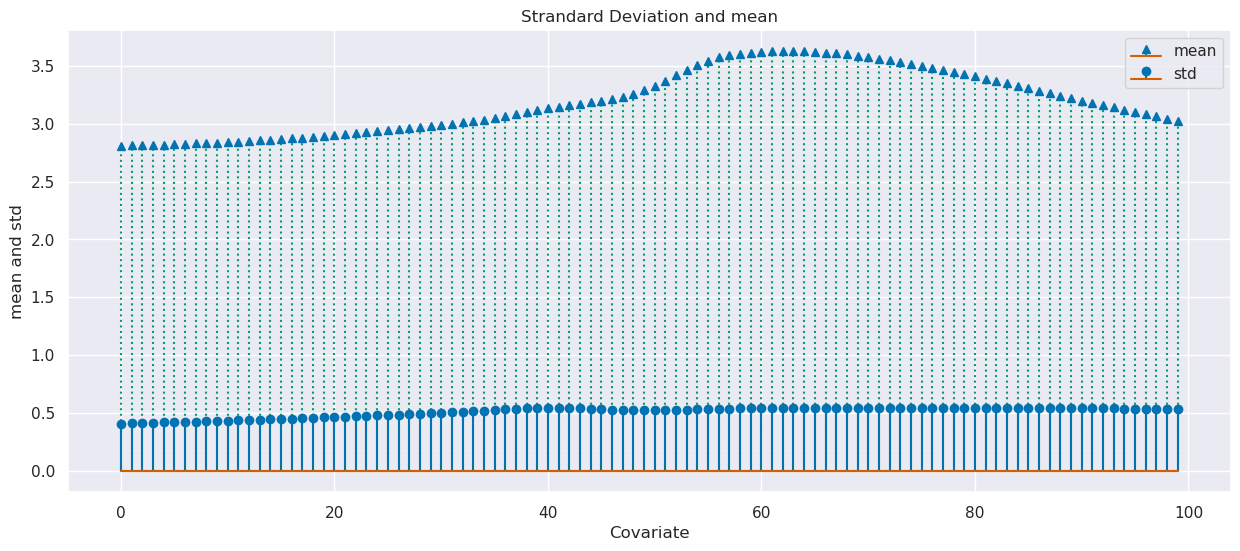

In [6]:
#Dimensions of X
n, p = X.shape

#Plot Mean and standart deviation 
plt.figure(figsize=(15,6))
plt.stem(range(p), X.mean(), label="mean", markerfmt='^', linefmt='g:')
plt.stem(range(p), X.std(), label="std")
plt.xlabel("Covariate")
plt.ylabel("mean and std")
plt.legend()
plt.title("Strandard Deviation and mean") 
plt.show()

We notice that data doesn't have a zero mean, so it isn't centered and standardized. The value aren't between 0 and 1 so the data isn't normalized.

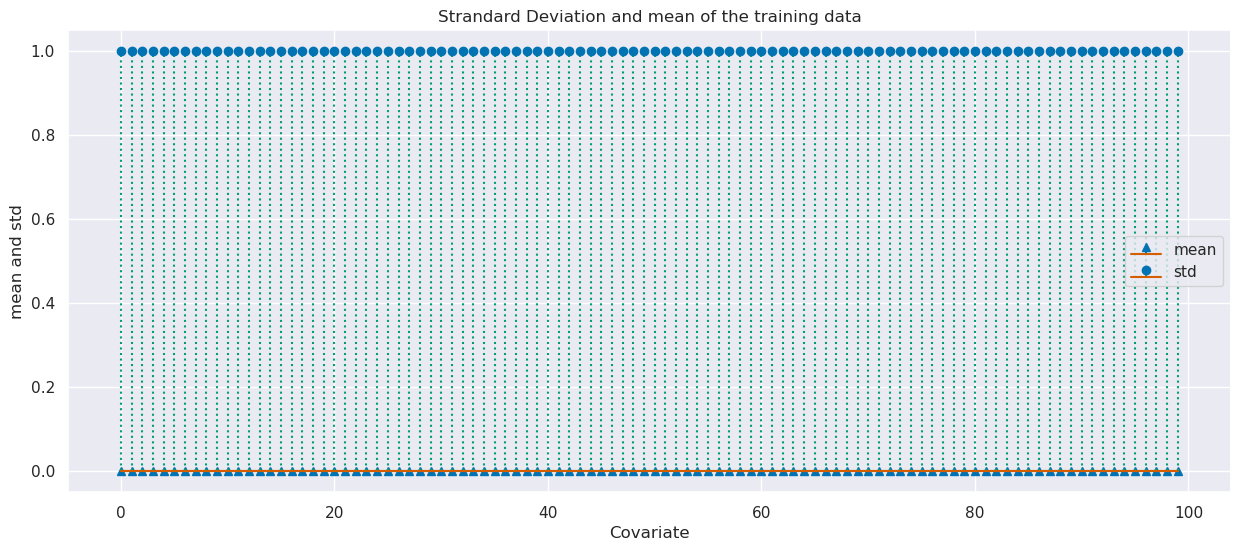

In [46]:
#c) 
#separate the data in train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

#center and standardize both 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)
Y_train = scaler.fit_transform(np.array(Y_train).reshape(-1,1)).flatten()
Y_test = scaler.transform(np.array(Y_test).reshape(-1,1)).flatten()

#We verify by plotting the mean and the standard deviation for both data
#Plot Mean and standart deviation of the training data
plt.figure(figsize=(15,6))
plt.stem(range(p), X_train.mean(axis=0), label="mean", markerfmt='^')
plt.stem(range(p), X_train.std(axis=0), label="std", linefmt='g:')
plt.xlabel("Covariate")
plt.ylabel("mean and std")
plt.legend()
plt.title("Strandard Deviation and mean of the training data") 

plt.show()

The trainaing data are standardized. 

In [8]:
#d)
model = LinearRegression().fit(X_train, Y_train)  # Fit a regular OLS 


## Do we need to intercept?? 

In [9]:
#e)
df_coef = pd.DataFrame()             #Empty DataFrame

X_bar = X.mean()
Y_bar = Y.mean()
Y_pred = model.predict(X_test)

#R² coefficient
def R2(Y_test, Y_test_pred):
    RSS = np.sum((Y_test - Y_test_pred) ** 2) #Residual Sum of Square
    TSS = np.sum((Y_test - Y_test.mean) ** 2)  #Total Sum Of Squares
    r2 = 1-RSS / TSS
    return r2

r2_OLS = r2_score(Y_test, Y_pred)
df_coef = pd.concat([df_coef, pd.DataFrame({'method': ["OLS"], 'R2': [r2_OLS]})], ignore_index=True)
print(f'coefficient of determination R2={r2_OLS:.4f}')


coefficient of determination R2=0.9601


## Variable selection 

## <u>Question 2)</u>
---

In [13]:
def forward_variable_selection(X, Y):
    r=Y.copy()
    n, p = X.shape                # Dimension of X
    A = [k for k in range(p)]     # Creating lists for the variables 
    S=[]                          # For the selected covariates
    order=[]                      # For orders of the variable selectioned
    
    for i in range (p):
        Ts = []                   #list for the test stats
        indexes = []              #list for indexes
        for k in A:      
            if (k not in order): 

                Xk_tild=X[:,k].reshape(-1,1)
                Xk = np.hstack((np.ones(Xk_tild.shape), Xk_tild))
                #We need to compute the OLS, s and sigma to compute Tk.

                #We compute OLS, sigma, the gram matrix for s and s: 
                model = LinearRegression()
                model = model.fit(Xk, Y)
                
                model_coef = model.coef_.T
                Y_pred = model.predict(Xk)
                
                #We compute the residual
                r = Y - Y_pred
                

                sigma = np.sqrt(1/(n-2)) * np.linalg.norm(r)**2
                
                gram = (1/n) * Xk.T @ Xk
                
        
                e1 = np.array([[0, 1]]).T
                
                s = np.sqrt(e1.T @ np.linalg.inv(gram) @ e1)

                # Calculates the test statistics 

                Tk = np.sqrt(n)*np.abs(model_coef)/(s*sigma)                
                Ts.append(Tk[0][1])
                indexes.append(k)
            
            
        #we search the index of argmax(T) 

        ind = Ts.index(max(Ts))

        Ks = indexes[ind]
        order.append(Ks)

        #We compute the p_value 
        # Calculates the p-value of the estimator 
        p_value = 2*(1 - stat.norm.cdf(Ts[ind]))
        S.append([Xk_tild,p_value])
        
    return (S, order)




In [14]:
S, order = forward_variable_selection(X_train, Y_train)
print(order)

[40, 39, 41, 38, 42, 37, 36, 43, 97, 96, 98, 95, 35, 99, 94, 93, 92, 34, 91, 44, 90, 89, 33, 88, 87, 86, 85, 32, 45, 84, 83, 82, 31, 81, 46, 80, 30, 79, 78, 77, 47, 29, 76, 75, 74, 73, 28, 48, 72, 71, 70, 27, 69, 68, 49, 67, 66, 65, 64, 63, 26, 62, 61, 60, 59, 58, 57, 50, 56, 55, 54, 25, 51, 53, 52, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 0, 1, 11, 2, 10, 3, 9, 4, 8, 5, 7, 6]


## <u>Question 3)</u>
---

In [12]:
Selected_S = []
i=0
while S[i][1] < 0.5 and i < len(S):
    Selected_S.append(S[0])
    i+=1
    
X_train_selected = X_train[:, order[:i-1]]
X_test_selected = X_test[:, order[i-1]]

model = LinearRegression()
model = model.fit(X_train_selected, Y_train)

Y_test_pred = model.predict(X_test_selected)


#a) 

X_train_selected.reshape(-1,1)

ValueError: Expected 2D array, got 1D array instead:
array=[-0.81433053  1.37891118 -0.3518037   0.41564981  0.60439346 -0.38179973
 -0.64880556 -0.68427007  0.57054259  0.51967666 -0.78815349 -0.54739641
 -0.38782403  0.06401682  0.09304465  1.82492496  0.52643607  0.18462844
 -0.67855057  0.44621957  0.01506934  1.41444741 -0.60457353 -0.60186618
 -1.17883688  0.2591613   0.51847538 -1.08054747  1.24115898 -0.02706494
 -0.50359469 -0.53070407  0.98638105 -0.29618645 -1.10312068  0.32376122
  1.42221088  1.89354108 -0.06502165 -0.41301495  0.80857439 -1.17731288
  2.92568752 -0.59632597  0.09304465  0.76048752 -1.24415398  0.83116553
 -0.09435428  0.96413057  0.26970383 -0.73572768  1.36209333  0.23230293].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Ridge

## <u>Question 5)</u>
---

In [48]:
def ridge (X, Y, alpha):
    n, p = X.shape
    
    # We compute the minimizer of the ridge estimator
    A=np.identity(p)
    
    Theta_Rdg = np.linalg.inv(X.T @ X + n * alpha * A) @ X.T @ Y
    
    return (Theta_Rdg)

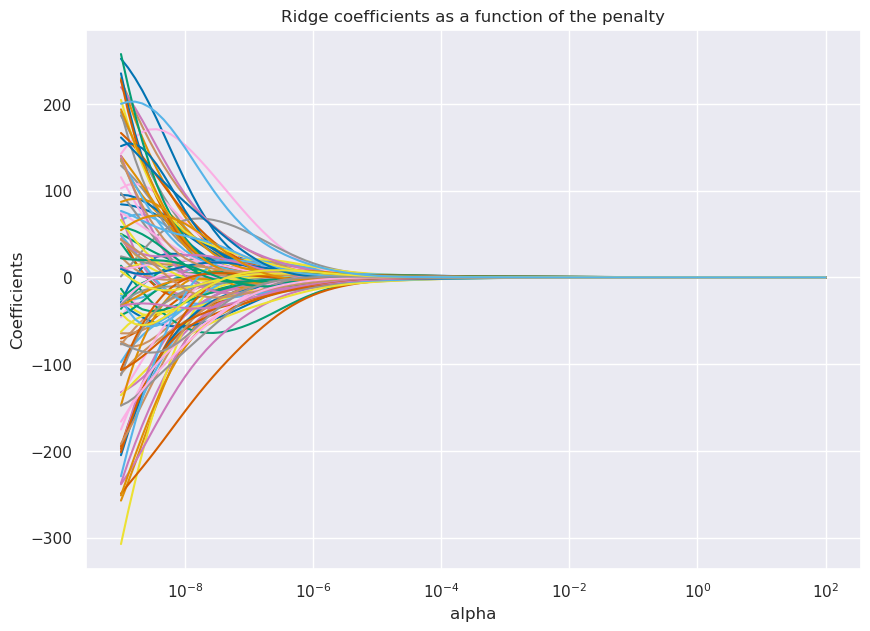

In [49]:
alpha_values = np.logspace(-9, 2, num=100, base=10)

thetas = []
for alpha in alpha_values:
    thetas.append(ridge(X_train, Y_train, alpha))
thetas = np.array(thetas)

# Plot the coefficients against log(alpha)
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(alpha_values, thetas)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('Coefficients')
ax.set_title('Ridge coefficients as a function of the penalty')
plt.show()

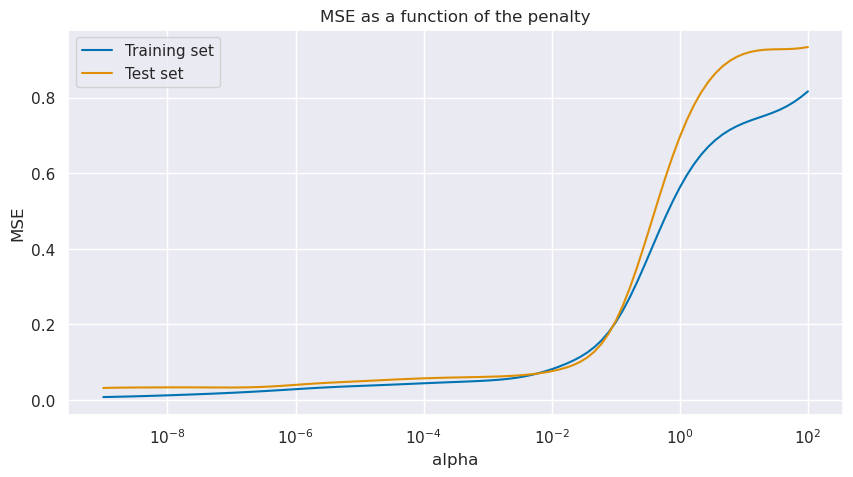

In [50]:
# Compute the MSE for each value of alpha
train_mse = []
test_mse = []

for alpha in alpha_values:
    estimator = ridge(X_train, Y_train, alpha)
    Y_train_pred = X_train @ estimator
    Y_test_pred = X_test @ estimator
    train_mse.append(mean_squared_error(Y_train, Y_train_pred))
    test_mse.append(mean_squared_error(Y_test, Y_test_pred))

# Plot the MSE against alpha
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(alpha_values, train_mse, label='Training set')
ax.plot(alpha_values, test_mse, label='Test set')
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('MSE')
ax.set_title('MSE as a function of the penalty')
ax.legend()
plt.show()


In [51]:
#c
estimator = ridge(X_train, Y_train, 10**(-9))
r2 = r2_score(Y_test, X_test @ estimator)
df_coef = pd.concat([df_coef, pd.DataFrame({'method': ["ridge"], 'R2': [r2]})], ignore_index=True)

In [52]:
df_coef

,method,R2
0,OLS,0.960055
1,ridge,0.969222
2,ridge,0.968269


# Crossvalidation, Lasso and elastic net

## <u>Question 6)</u>
---

In [60]:
#a)
train_mse = []
test_mse = []
alpha_values2 = np.logspace(-5, -2, num=100, base=10)

nb_coef_non_null = []
for pen in alpha_values2:
    model = Lasso(alpha = pen, tol=0.05, max_iter=10000)
    model = model.fit(X_train, Y_train)
    coefs = model.coef_
    Y_train_pred = X_train @ coefs
    Y_test_pred = X_test @ coefs
    train_mse.append(mean_squared_error(Y_train, Y_train_pred))
    test_mse.append(mean_squared_error(Y_test, Y_test_pred))
    nb_coef = 0
    #print(np.array(Y_test).shape)
    for coef in coefs:
        if coef != 0:
            nb_coef += 1
    nb_coef_non_null.append(nb_coef)
    


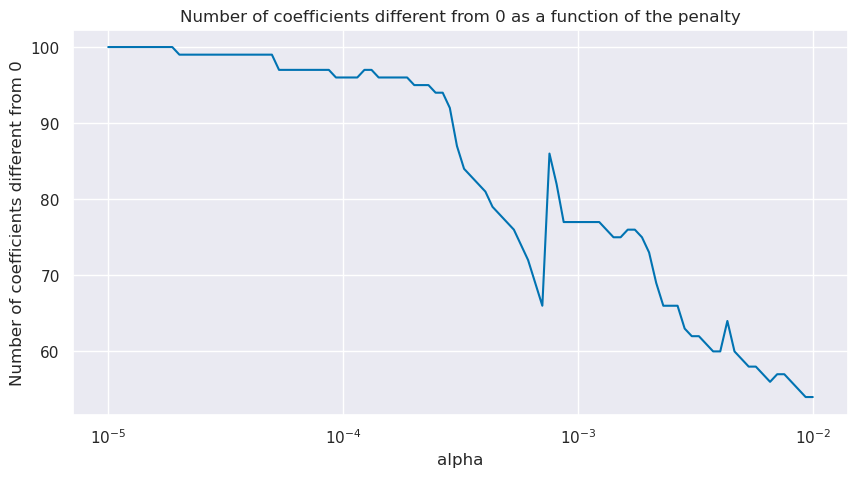

In [61]:

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(alpha_values2, nb_coef_non_null)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('Number of coefficients different from 0')
ax.set_title('Number of coefficients different from 0 as a function of the penalty')
plt.show()

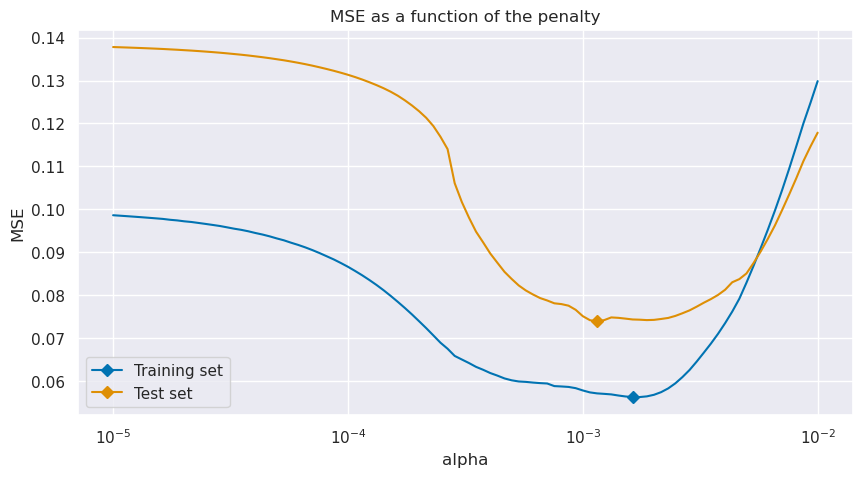

In [66]:
#c) 
argmin1 = np.argmin(train_mse)
argmin2 = np.argmin(test_mse)

# Plot the MSE against alpha
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(alpha_values2, train_mse,'-D', markevery=[argmin1], label='Training set')
ax.plot(alpha_values2, test_mse, '-D', markevery=[argmin2], label='Test set')
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('MSE')
ax.set_title('MSE as a function of the penalty')
ax.legend()
plt.show()

